# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
from sklearn.linear_model import LinearRegression as LinReg
linreg = LinReg()

In [5]:
linreg.fit(X_train, y_train)

LinearRegression()

## 3. Calculate and print R-squared for both the training and the testing set.

In [6]:
from sklearn import metrics

In [7]:
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)

In [8]:
print("R2 - Determination Coeffiecient of test", metrics.r2_score(y_test, y_pred_test))
print("R2 - Determination Coefficient of train", metrics.r2_score(y_train, y_pred_train))

R2 - Determination Coeffiecient of test 0.6304410035910326
R2 - Determination Coefficient of train 0.7653062658315821


## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
print("MSE - Mean Squarred Error of test", metrics.mean_squared_error(y_test, y_pred_test))
print("MSE - Mean Squarred Error of test", metrics.mean_squared_error(y_train, y_pred_train))

MSE - Mean Squarred Error of test 33.35363575570029
MSE - Mean Squarred Error of test 19.348675657836527


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [10]:
print('MAE - Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred_test))
print('MAE - Mean Absolute Error', metrics.mean_absolute_error(y_train, y_pred_train))

MAE - Mean Absolute Error 3.883339339078888
MAE - Mean Absolute Error 3.089948464892908


## Classification Model Evaluation

In [11]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [12]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/home/guillermo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

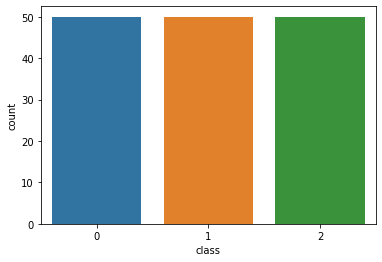

In [13]:
import seaborn as sns
sns.countplot(data['class'])
# Exaact amount of elements per each value of class

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [14]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [15]:
from sklearn.linear_model import LogisticRegression

In [19]:
y_train = pd.Series(y_train['class'])

In [20]:
log = LogisticRegression()

In [21]:
log.fit(X_train, y_train)

/home/guillermo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
X_train.shape

(120, 4)

In [23]:
y_train.shape

(120,)

In [24]:
y_pred_test = log.predict(X_test)
y_pred_train = log.predict(X_train)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 

In [34]:
acc_y_test = accuracy_score(y_test, y_pred_test)
acc_y_train = accuracy_score(y_train, y_pred_train)
print("Accuracy test score of test ", acc_y_test)
print("Accuracy test score of train ", acc_y_train)

Accuracy test score of test  0.9666666666666667
Accuracy test score of train  0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [40]:
from sklearn.metrics import balanced_accuracy_score

In [41]:
bal_y_test = balanced_accuracy_score(y_test, y_pred_test)
bal_y_train = balanced_accuracy_score(y_train, y_pred_train)
print("Balanced Accuracy test score of test ", bal_y_test)
print("Balanced Accuracy test score of train ", bal_y_train)

Balanced Accuracy test score of test  0.9743589743589745
Balanced Accuracy test score of train  0.966108966108966


## 10. Calculate and print the precision score for both the training and the testing set.

In [47]:
prec_y_test = precision_score(y_test, y_pred_test, average='micro')
prec_y_train = precision_score(y_train, y_pred_train, average='micro')
print("Precision test score of test ", prec_y_test)
print("Precision test score of train ", prec_y_train)

Precision test score of test  0.9666666666666667
Precision test score of train  0.9666666666666667


## 11. Calculate and print the recall score for both the training and the testing set.

In [49]:
rec_y_test = recall_score(y_test,y_pred_test, average='micro')
rec_y_train= recall_score(y_train, y_pred_train, average='micro')
print('Recall score of test :', rec_y_test)
print('Recall score of train :', rec_y_train)

Recall score of test : 0.9666666666666667
Recall score of train : 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [50]:
f1_y_test = recall_score(y_test,y_pred_test, average='micro')
f1_y_train= recall_score(y_train, y_pred_train, average='micro')
print('F1 score of test :', f1_y_test)
print('F1 score of train :', f1_y_train)

F1 score of test : 0.9666666666666667
F1 score of train : 0.9666666666666667


## 13. Generate confusion matrices for both the training and the testing set.

In [51]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]])

In [52]:
confusion_matrix(y_train, y_pred_train)

array([[41,  0,  0],
       [ 0, 40,  2],
       [ 0,  2, 35]])

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [54]:
models={
    'dis': LinearDiscriminantAnalysis(),
    'neighbors': KNeighborsClassifier(),
    'naive': GaussianNB(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
}

In [55]:
for name, model in models.items():
    print("TRAINING ", name)
    model.fit(X_train,y_train)

TRAINING  dis
TRAINING  neighbors
TRAINING  naive
TRAINING  tree
TRAINING  svm


In [59]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("Accuracy: ", accuracy_score(y_test,y_pred_test))
    print("Precision: ", precision_score(y_test,y_pred_test, average='micro'))
    print("Recall: ", recall_score(y_test,y_pred_test, average='micro'))
    print("F1: ", f1_score(y_test, y_pred_test, average='micro'))

--------dis--------
Accuracy:  0.9666666666666667
Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1:  0.9666666666666667
--------neighbors--------
Accuracy:  0.9666666666666667
Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1:  0.9666666666666667
--------naive--------
Accuracy:  0.9666666666666667
Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1:  0.9666666666666667
--------tree--------
Accuracy:  0.9666666666666667
Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1:  0.9666666666666667
--------svm--------
Accuracy:  0.9666666666666667
Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1:  0.9666666666666667


In [60]:
# We get the exact same value with the other models of the lesson